# Bubble Plot

Import primary modules.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

The dataset contains annual data on the flows of international migrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. In this notebook, we will focus on the Canadian Immigration data.

Let's download and import our primary Canadian Immigration dataset using *pandas* `read_excel()` You may need to run the following command.
```
!conda install -c anaconda xlrd --yes
```

Download the dataset and read it into a *pandas* dataframe.

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2 )
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations. You don't need to understand it.

In [5]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship', 
                       skiprows=range(20), 
                       skipfooter=2,
                       engine='openpyxl') 

columns_to_drop = ['AREA', 'REG', 'DEV', 'Type', 'Coverage']
existing_columns_to_drop = [col for col in columns_to_drop if col in df_can.columns]

if existing_columns_to_drop:
    df_can.drop(existing_columns_to_drop, axis=1, inplace=True)

df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.columns = list(map(str, df_can.columns))
df_can.set_index('Country', inplace=True)
df_can['Total'] = df_can.sum(axis=1)
years = list(map(str, range(1980, 2014)))
df_can_t = df_can[years].transpose() 
df_can_t.index = map(int, df_can_t.index)
df_can_t.index.name = 'Year'
df_can_t.reset_index(inplace=True)
df_can_t.head()

/var/folders/ch/lkh88j2j4yg6ddb9sh10w3r80000gn/T/ipykernel_62644/1647193639.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


A `bubble plot` is a variation of the `scatter plot` that displays three dimensions of data (x, y, z). The datapoints are replaced with bubbles, and the size of the bubble is determined by the third variable 'z', also known as the weight. In `maplotlib`, we can pass in an array or scalar to the keyword `s` to `plot()`, that contains the weight of each point.

Step 1: Normalize the data pertaining to China and India.

There are several methods of normalizations in statistics, each with its own use. In this case, we will use [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling) to bring all values into the range [0,1]. The general formula is:

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod3Fig3FeatureScaling.png" align="center">

where *`X`* is an original value, *`X'`* is the normalized value. The formula sets the max value in the dataset to 1, and sets the min value to 0. The rest of the datapoints are scaled to a value between 0-1 accordingly.


In [6]:
# normalize India data
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())
# normalize china data
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

Step 2: Generate the bubble plots.

- To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the `ax` parameter. 
- We will also pass in the weights using the `s` parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore we will:
    - multiply weights by 2000 to scale it up on the graph, and,
    - add 10 to compensate for the min value (which has a 0 weight and therefore scale with x2000).

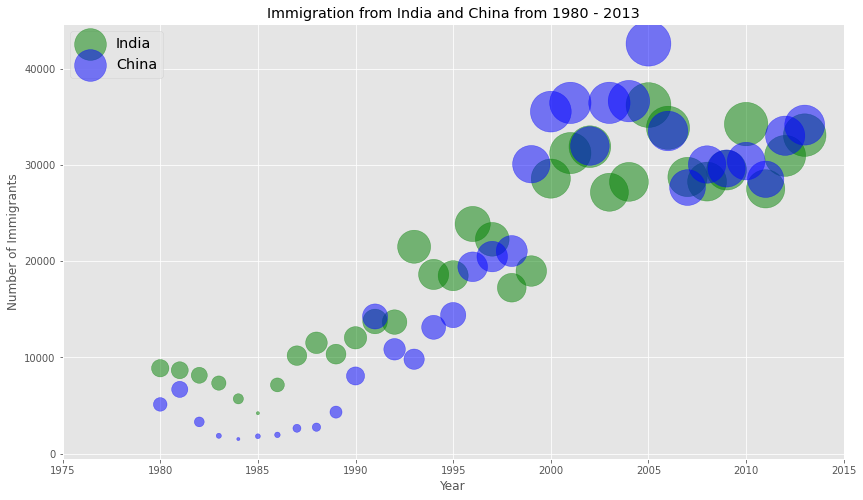

In [8]:
# normalize India data
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

# normalize China data
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

# Create the bubble chart
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    figsize=(14, 8),
                    alpha=0.5,                 
                    color='green',
                    s=norm_india * 2000 + 10, 
                    xlim=(1975, 2015)
                   )

ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    alpha=0.5,
                    color="blue",
                    s=norm_china * 2000 + 10,
                    ax=ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from India and China from 1980 - 2013')
ax0.legend(['India', 'China'], loc='upper left', fontsize='x-large')

plt.show()

#### Ou trouvez les top 5 pays automatiquement :

Pays disponibles: ['India', 'China', 'Philippines', 'Pakistan', 'United States of America']


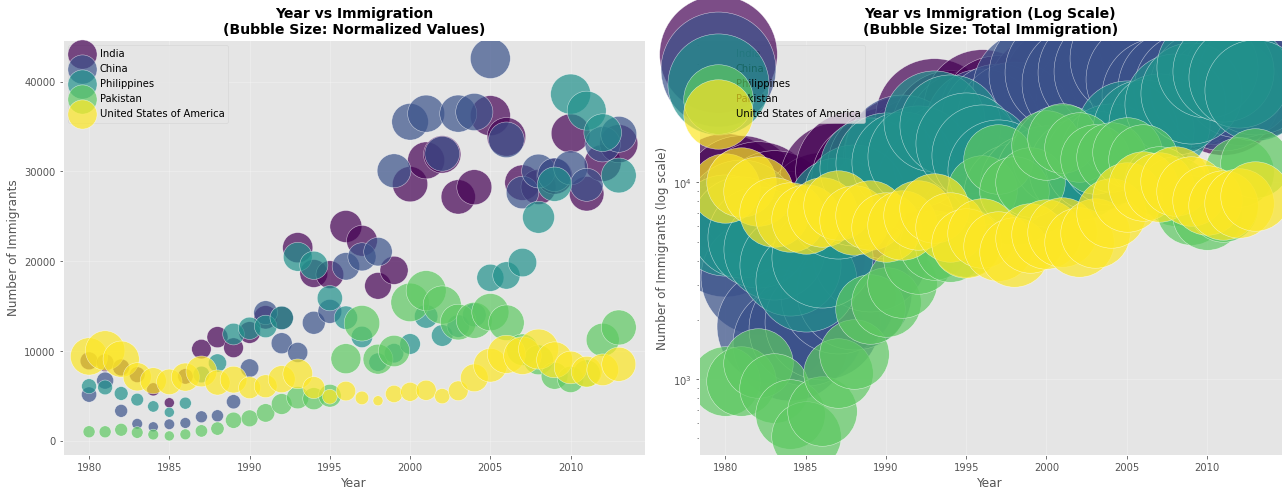

In [15]:
# ÉTAPE 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

# ÉTAPE 2 & 3: Sélectionner les pays
countries = ['India', 'China', 'Philippines', 'Pakistan', 'United States of America']
available_countries = [c for c in countries if c in df_can_t.columns]
print(f"Pays disponibles: {available_countries}")

# ÉTAPE 4: Créer la figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# ÉTAPE 5: Couleurs
colors = plt.cm.viridis(np.linspace(0, 1, len(available_countries)))

# ÉTAPE 6 & 7: Premier graphique
for i, country in enumerate(available_countries):
    norm_data = (df_can_t[country] - df_can_t[country].min()) / (df_can_t[country].max() - df_can_t[country].min())
    ax1.scatter(df_can_t['Year'], df_can_t[country], s=norm_data * 1500 + 100,
                alpha=0.7, color=colors[i], label=country, edgecolors='white', linewidth=0.5)

ax1.set_title('Year vs Immigration\n(Bubble Size: Normalized Values)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Number of Immigrants', fontsize=12)
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(True, alpha=0.3)

# ÉTAPE 8 & 9: Deuxième graphique
for i, country in enumerate(available_countries):
    total_immigration = df_can_t[country].sum()
    ax2.scatter(df_can_t['Year'], df_can_t[country], s=total_immigration / 50,
                alpha=0.7, color=colors[i], label=country, edgecolors='white', linewidth=0.5)

ax2.set_title('Year vs Immigration (Log Scale)\n(Bubble Size: Total Immigration)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Number of Immigrants (log scale)', fontsize=12)
ax2.set_yscale('log')
ax2.legend(loc='upper left', fontsize=10)
ax2.grid(True, alpha=0.3)

# ÉTAPE 10: Afficher
plt.tight_layout()
plt.show()